# **Exercise 2**


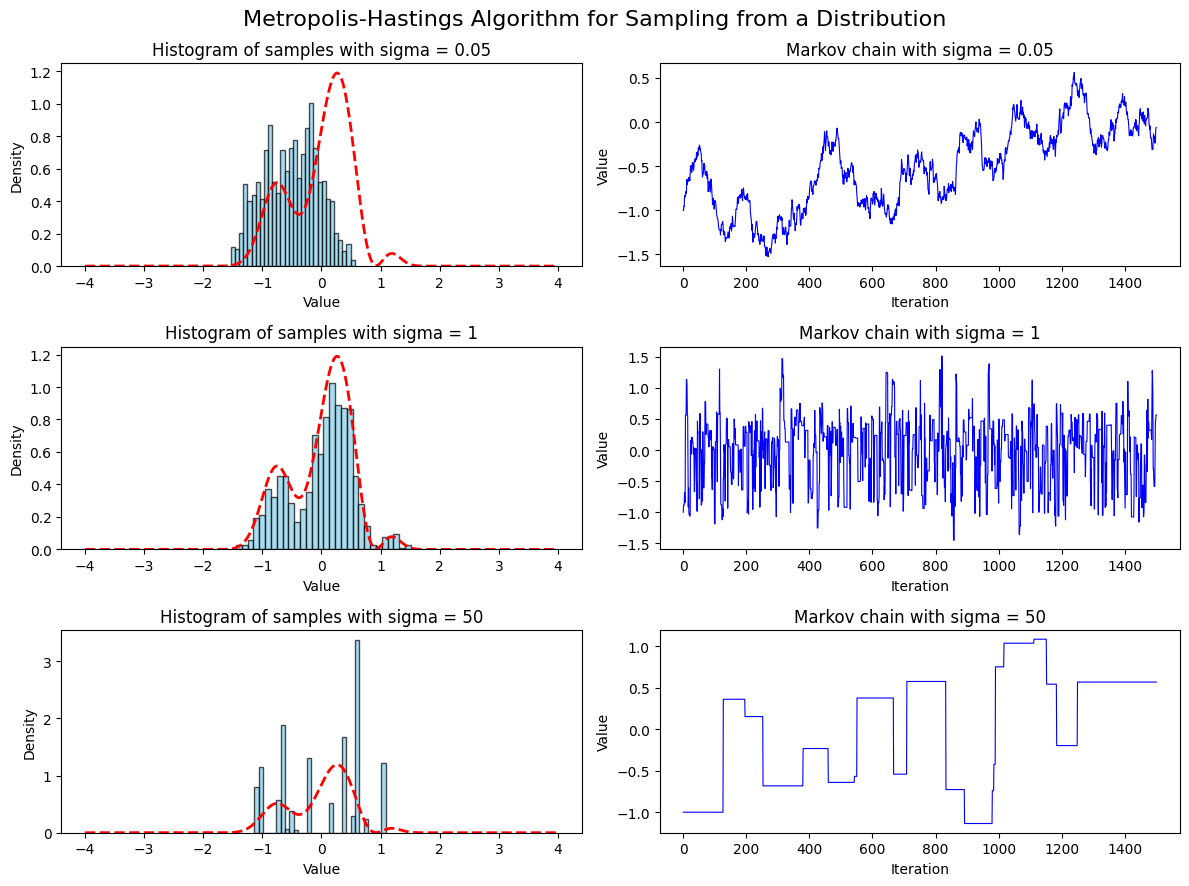

In [2]:
# Metropolis-Hastings Algorithm for Sampling from a Distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Target distribution P(x) proportional to exp(-x^4) * (2 + sin(5x) + sin(-2x^2))
def target_distribution(x):
    return np.exp(-x**4) * (2 + np.sin(5*x) + np.sin(-2*x**2))

# Proposal distribution Q(x'|x) as Normal(x, sigma^2)
def proposal_distribution(x, sigma):
    return np.random.normal(x, sigma)

# Metropolis-Hastings algorithm
def metropolis_hastings(p, q, iterations, initial_value, sigma):
    x = initial_value
    samples = [x]

    for i in range(iterations):
        x_star = q(x, sigma)
        p_x_star = p(x_star)
        p_x = p(x)

        acceptance = min(1, p_x_star / p_x)
        if np.random.rand() < acceptance:
            x = x_star
        samples.append(x)

    return np.array(samples)

# Initial value
x0 = -1

# Number of samples
iterations = 1500

# Different sigma values
sigma_values = [0.05, 1, 50]

# Create subplots for histograms and Markov chains
fig, axes = plt.subplots(3, 2, figsize=(12, 9))

# Generate samples and plot for each sigma
for i, sigma in enumerate(sigma_values):
    # Generate samples using Metropolis-Hastings algorithm
    samples = metropolis_hastings(target_distribution, proposal_distribution, iterations, x0, sigma)

    # Plot histogram
    axes[i, 0].hist(samples, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')

    # Plot actual distribution
    x_values = np.linspace(-4, 4, 1000)
    y_values = target_distribution(x_values)
    axes[i, 0].plot(x_values, y_values / sum(y_values) * iterations * 0.1, color='red', linestyle='--', linewidth=2)  # scale to histogram
    axes[i, 0].set_title(f'Histogram of samples with sigma = {sigma}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Density')

    # Plot Markov chain
    axes[i, 1].plot(samples, 'b-', linewidth=0.8)
    axes[i, 1].set_title(f'Markov chain with sigma = {sigma}')
    axes[i, 1].set_xlabel('Iteration')
    axes[i, 1].set_ylabel('Value')

# Add main titles
fig.suptitle('Metropolis-Hastings Algorithm for Sampling from a Distribution', fontsize=16)

# Adjust layout and display plots
plt.tight_layout()
plt.show()
